In [77]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'helvetica',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)
import numpy as np
import pandas as pd
import os
from glob import iglob

In [3]:
# Load all structural p-values across both analyses
exac    = pd.read_csv("exac/daf_K_summary.txt",delimiter='\t')
exac["dataset"] = "exac"
clinvar = pd.read_csv("clinvar/pathogenic_K_summary.txt",delimiter='\t')
clinvar["dataset"] = "clinvar"
cosmic  = pd.read_csv("cosmic/recurrence_K_summary.txt",delimiter='\t')
cosmic["dataset"] = "cosmic"
consurf = pd.read_csv("consurf/score_K_summary.txt",delimiter='\t')
consurf["dataset"] = "consurf"
df = exac.append(clinvar).append(cosmic).append(consurf)

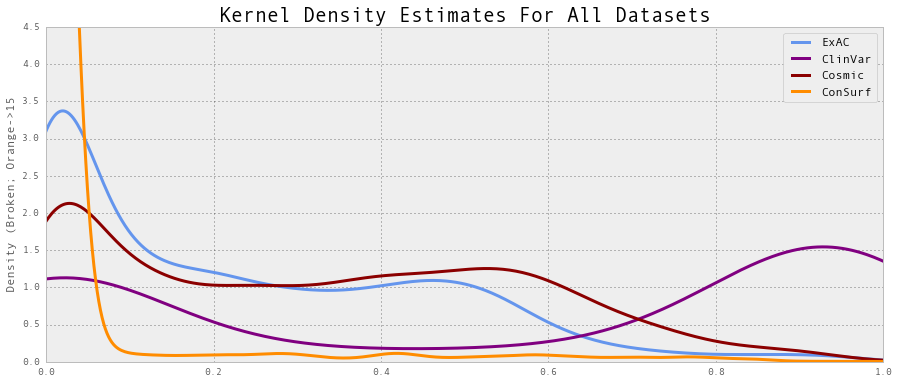

In [59]:
# Compare p-value distributions
fig,ax = plt.subplots(1,1,figsize=(15,6))
plt.title("Kernel Density Estimates For All Datasets",fontsize=20)
exac["Kp"].plot(kind='kde',ax=ax,color="cornflowerblue",lw=3,grid=100,label="ExAC")
clinvar["Kp"].plot(kind='kde',ax=ax,color="purple",lw=3,grid=100,label="ClinVar")
cosmic["Kp"].plot(kind='kde',ax=ax,color="darkred",lw=3,grid=100,label="Cosmic")
consurf["Kp"].plot(kind='kde',ax=ax,color="darkorange",lw=3,grid=100,label="ConSurf")
plt.xlim([0,1])
plt.ylim([0,4.5])
plt.ylabel("Density (Broken; Orange->15")
plt.legend()
plt.show()

In [37]:
# Only retain nominally significant results for each analysis
kdf = df[df["Kp"]<0.01]
wdf = df[df["wKp"]<0.01]

In [76]:
print "\t     Mean    SD"
print kdf.groupby("dataset")["T"].apply(lambda x: ("%.2f"%np.mean(x),"%.2f"%np.std(x)))
print ''
print wdf.groupby("dataset")["T"].apply(lambda x: ("%.2f"%np.mean(x),"%.2f"%np.std(x)))

	     Mean    SD
dataset
clinvar    (19.78, 12.85)
consurf     (17.51, 8.06)
cosmic     (20.89, 15.26)
exac       (21.76, 18.10)
Name: T, dtype: object

dataset
consurf     (19.63, 9.72)
cosmic     (11.74, 13.80)
exac       (10.58, 11.57)
Name: T, dtype: object


Protein overlap: (ExAC Kp<0.01) (Clinvar):	 112
Protein overlap: (ExAC wKp<0.01) (Clinvar):	  15


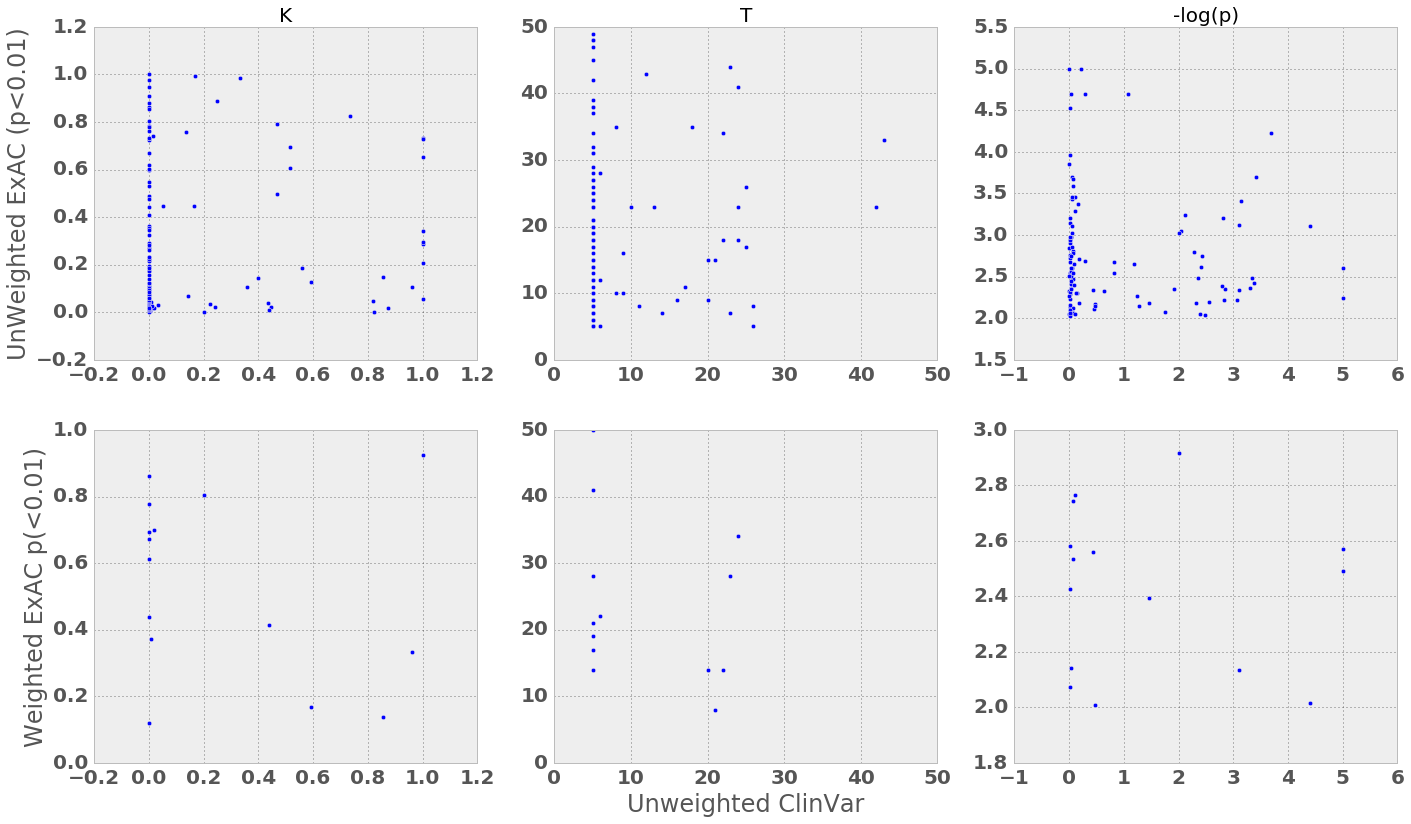

In [173]:
fig,ax = plt.subplots(2,3,figsize=(20,12))
tdf  = exac.merge(clinvar,on=["structid","chain"],suffixes=('_exac','_clinvar'))
tdf = tdf[tdf["Kp_exac"]<0.01]
print "Protein overlap: (ExAC Kp<0.01) (Clinvar):\t%4d"%len(tdf)
ax[0][0].scatter(tdf["K_clinvar"],tdf["K_exac"])
ax[0][1].scatter(tdf["T_clinvar"],tdf["T_exac"])
ax[0][1].set_xlim([0,50])
ax[0][1].set_ylim([0,50])
ax[0][2].scatter(-np.log10(tdf["Kp_clinvar"]),-np.log10(tdf["Kp_exac"]))
tdf = tdf[tdf["wKp_exac"]<0.01]
print "Protein overlap: (ExAC wKp<0.01) (Clinvar):\t%4d"%len(tdf)
ax[1][0].scatter(tdf["K_clinvar"],tdf["wK_exac"])
ax[1][1].scatter(tdf["T_clinvar"],tdf["wT_exac"])
ax[1][2].scatter(-np.log10(tdf["Kp_clinvar"]),-np.log10(tdf["wKp_exac"]))
ax[0][0].set_title("K",fontsize=20)
ax[0][1].set_title("T",fontsize=20)
ax[1][1].set_xlim([0,50])
ax[1][1].set_ylim([0,50])
ax[0][2].set_title("-log(p)",fontsize=20)
ax[0][0].set_ylabel("UnWeighted ExAC (p<0.01)")
ax[1][0].set_ylabel("Weighted ExAC p(<0.01)")
ax[1][1].set_xlabel("Unweighted ClinVar")
plt.tight_layout()
plt.show()

Number of proteins analyzed in all datasets:  294


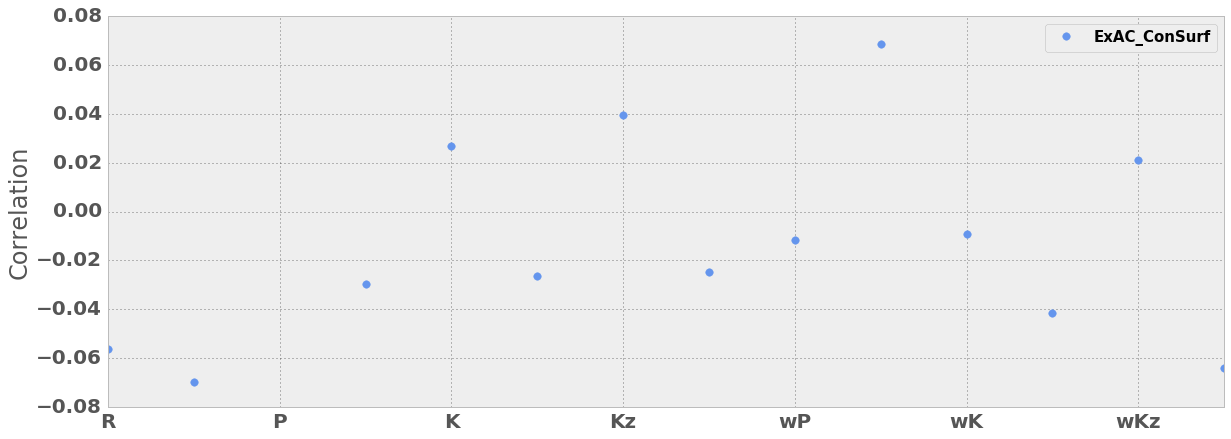

In [140]:
# Limit each dataframe to matching proteins
set1 = [(t1,t2) for _,t1,t2 in clinvar[["structid","chain"]].itertuples()]
set2 = [(t1,t2) for _,t1,t2 in exac[["structid","chain"]].itertuples()]
set3 = [(t1,t2) for _,t1,t2 in consurf[["structid","chain"]].itertuples()]
set4 = [(t1,t2) for _,t1,t2 in cosmic[["structid","chain"]].itertuples()]
intersection = set(set1).intersection(set2).intersection(set3).intersection(set4)
intersection = pd.DataFrame(list(intersection),columns=["structid","chain"])

print "Number of proteins analyzed in all datasets: %4d"%len(intersection)
texac    = exac.merge(intersection,on=["structid","chain"]).sort_values(by=["structid","chain"])
tclinvar = clinvar.merge(intersection,on=["structid","chain"]).sort_values(by=["structid","chain"])
tcosmic  = cosmic.merge(intersection,on=["structid","chain"]).sort_values(by=["structid","chain"])
tconsurf = consurf.merge(intersection,on=["structid","chain"]).sort_values(by=["structid","chain"])

plt.figure(figsize=(20,7))
plt.ylabel("Correlation")
texac.corrwith(tconsurf).plot(lw=0,marker='.',markersize=15,label="ExAC_ConSurf",color="cornflowerblue")
# tclinvar.corrwith(tconsurf).plot(lw=0,marker='x',markersize=15,label="ClinVar_ConSurf",color="purple")
# tcosmic.corrwith(tconsurf).plot(lw=0,marker='^',markersize=15,label="Cosmic_ConSurf",color="darkred")
# tclinvar.corrwith(tcosmic).plot(lw=0,marker='+',markersize=15,label="ClinVar_Cosmic",color="black")

# plt.xlim([-1,15])
plt.legend(fontsize=15,loc="upper right",numpoints=1)
plt.show()

/Users/mikesivley/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


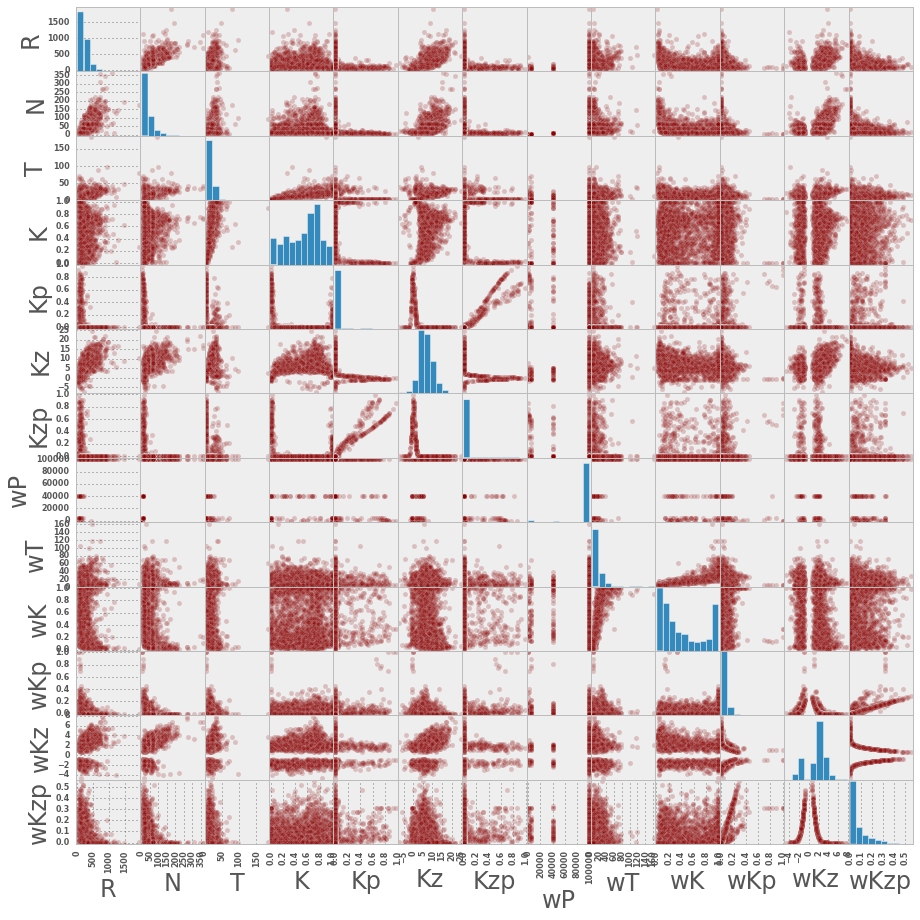

In [9]:
# Correlation matrix of column values
tdf = df.dropna(how='all',axis=1).drop("P",axis=1)
axes = pd.tools.plotting.scatter_matrix(tdf,alpha=0.2,figsize=(15,15),c="darkred",grid="Off",s=100)
plt.show()

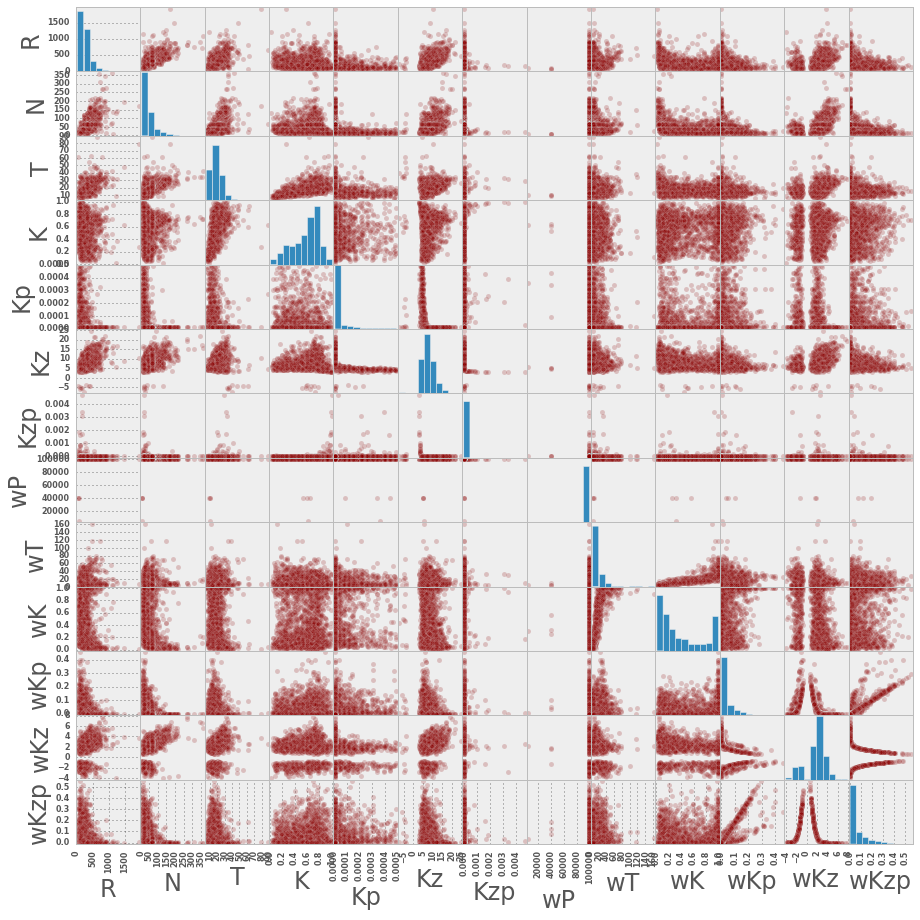

In [10]:
# Correlation matrix of column values for significant proteins
font = {'family' : 'helvetica',
        'weight' : 'bold',
        'size'   : 20}
mpl.rc('font', **font)
tdf = df[df["Kp"]<0.0005].dropna(how='all',axis=1).drop("P",axis=1)
axes = pd.tools.plotting.scatter_matrix(tdf,alpha=0.2,figsize=(15,15),c="darkred",grid="Off",s=100)
plt.show()

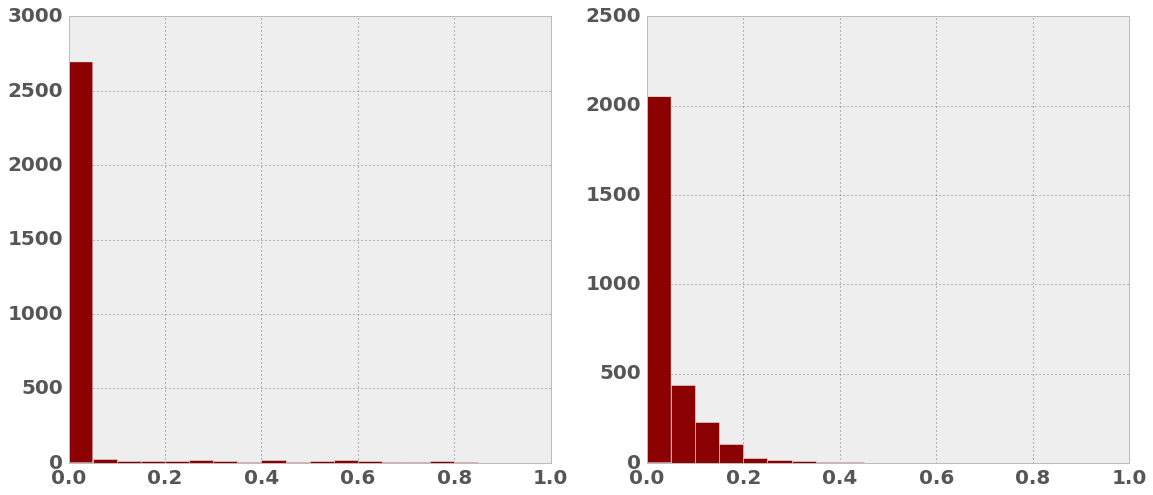

In [11]:
fig,ax = plt.subplots(1,2,figsize=(19,8))
ax[0].hist(df["Kp"].values,bins=np.arange(0,1,0.05),color="darkred")
ax[1].hist(df["wKp"].values,bins=np.arange(0,1,0.05),color="darkred")
plt.show()

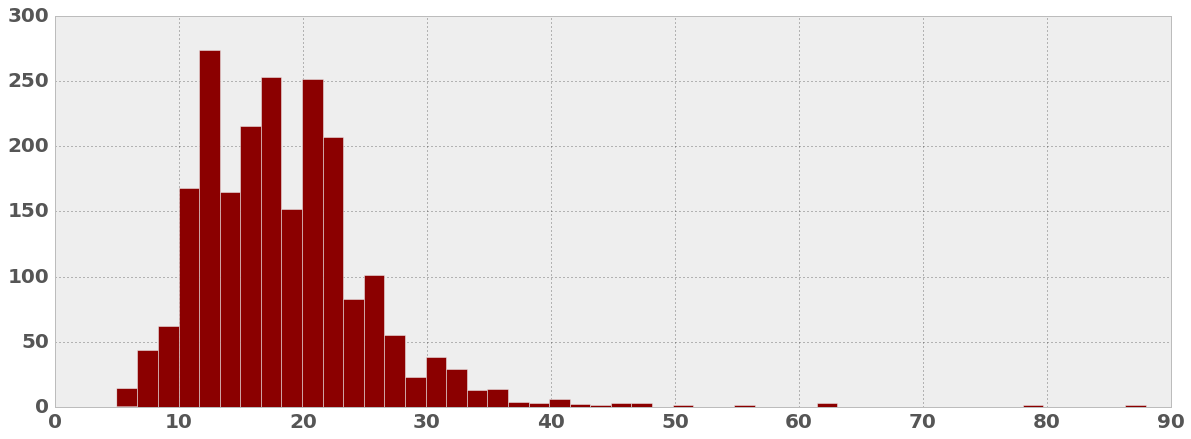

In [12]:
plt.figure(figsize=(20,7))
plt.hist(tdf["T"].values,bins=50,color="darkred")
plt.show()

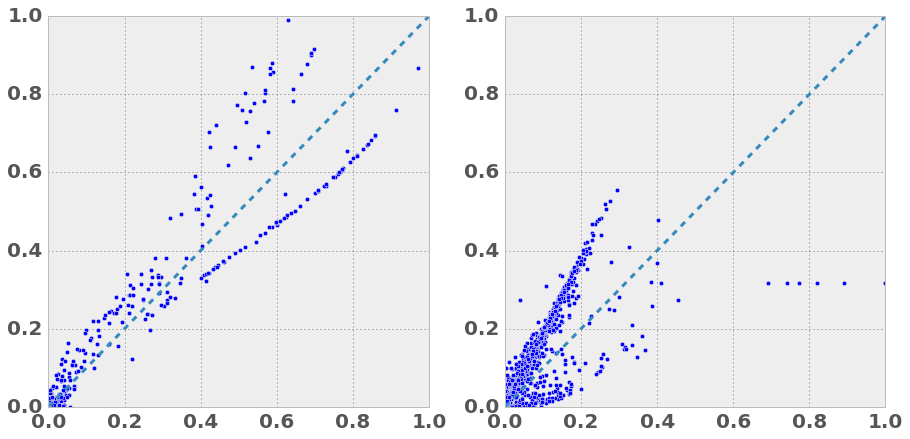

In [13]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(df["Kp"].values,df["Kzp"].values)
ax[1].scatter(df["wKp"].values,df["wKzp"].values)
ax[0].set_xlim([0,1])
ax[0].set_ylim([0,1])
ax[1].set_xlim([0,1])
ax[1].set_ylim([0,1])
ax[0].plot([0,1],[0,1],ls="dashed",lw=3)
ax[1].plot([0,1],[0,1],ls="dashed",lw=3)
plt.show()

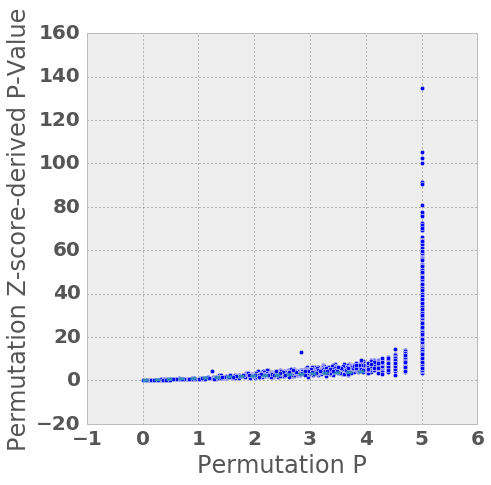

In [14]:
fig,ax = plt.subplots(1,1,figsize=(7,7))
ax.scatter(-np.log10(df["Kp"].values),-np.log10(df["Kzp"].values))
ax.plot([0,4],[0,4],ls="dashed",lw=3)
ax.set_xlabel("Permutation P")
ax.set_ylabel("Permutation Z-score-derived P-Value")
plt.show()

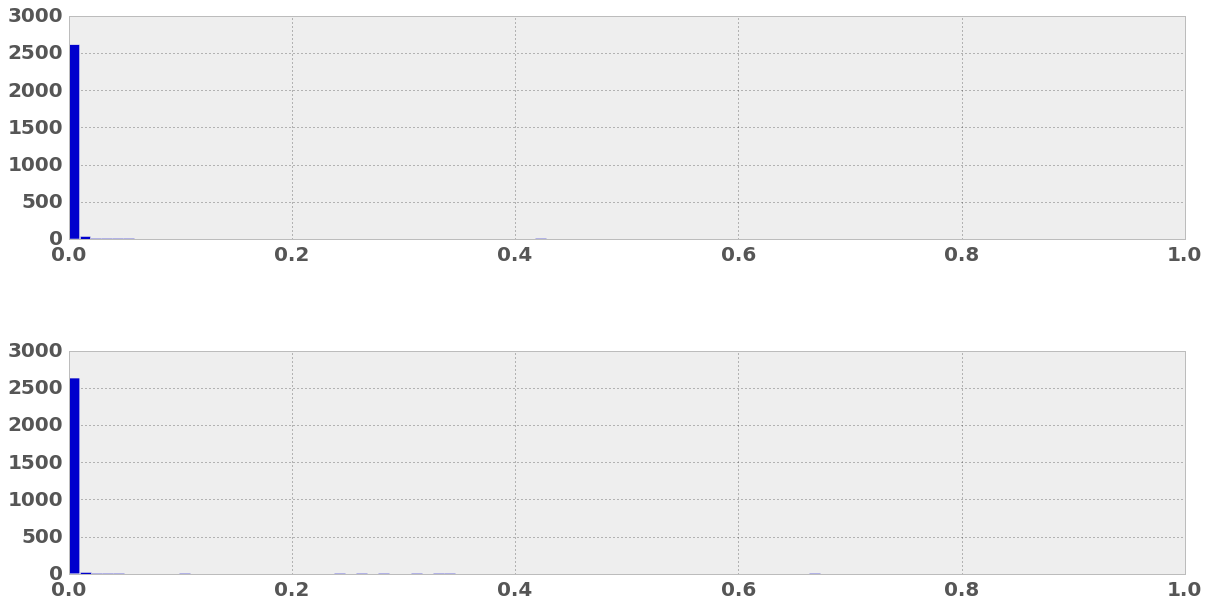

In [15]:
# Permutation p-value distributions
fig,ax = plt.subplots(2,1,figsize=(20,10))
ax[0].hist(df["Kp"],bins=100, color="mediumblue")
ax[1].hist(df["Kzp"],bins=100,color="mediumblue")
plt.show()

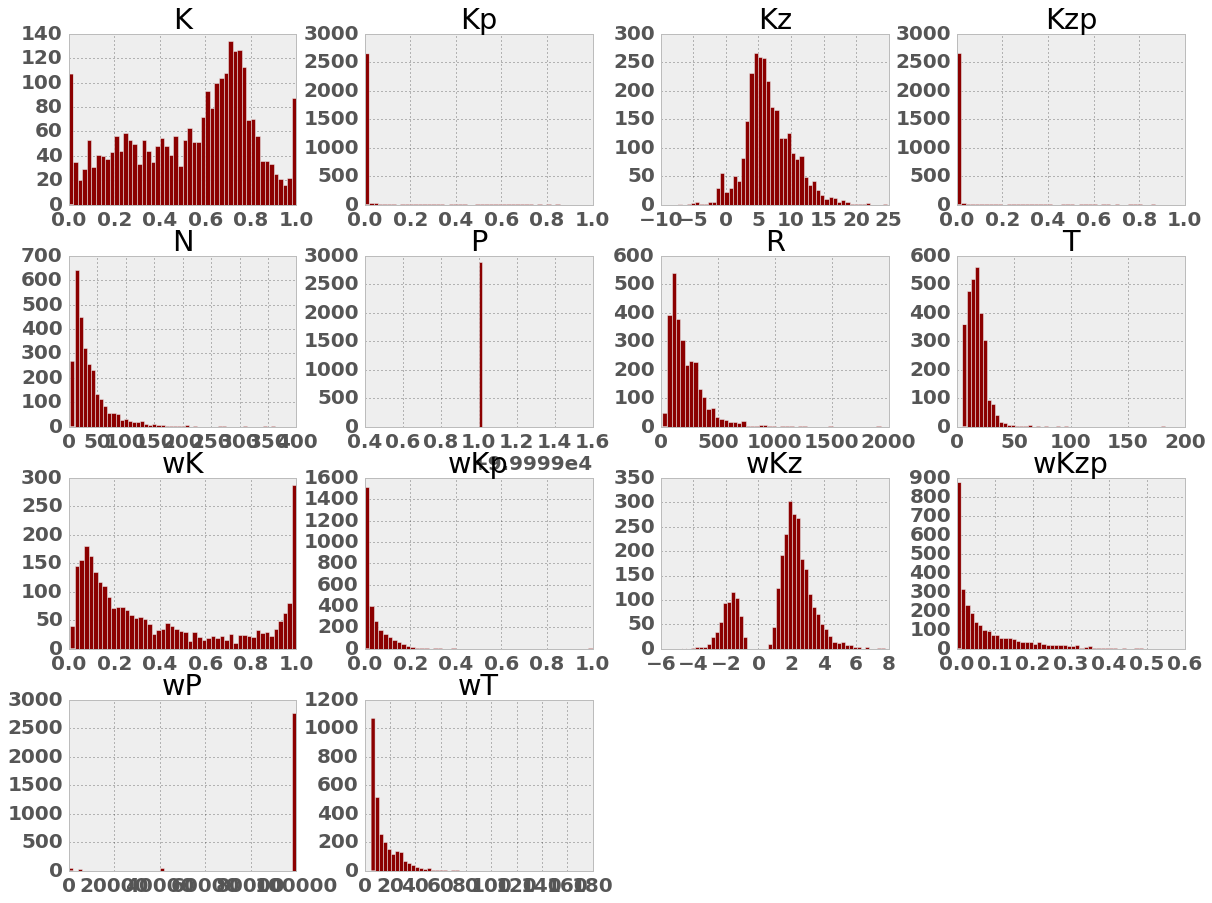

In [16]:
# All
df.hist(bins=50,figsize=(20,15),color="darkred")
plt.show()

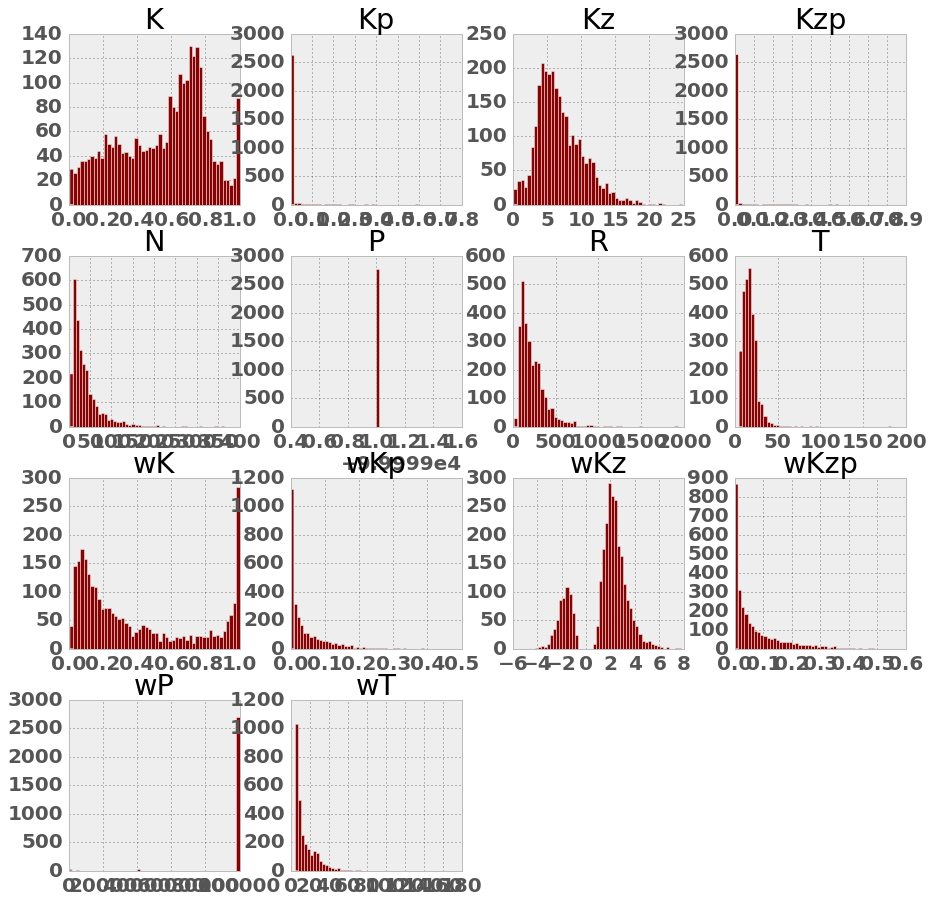

In [17]:
# Clustered
df[df["Kz"]>0].hist(bins=50,figsize=(15,15),color="darkred")
plt.show()

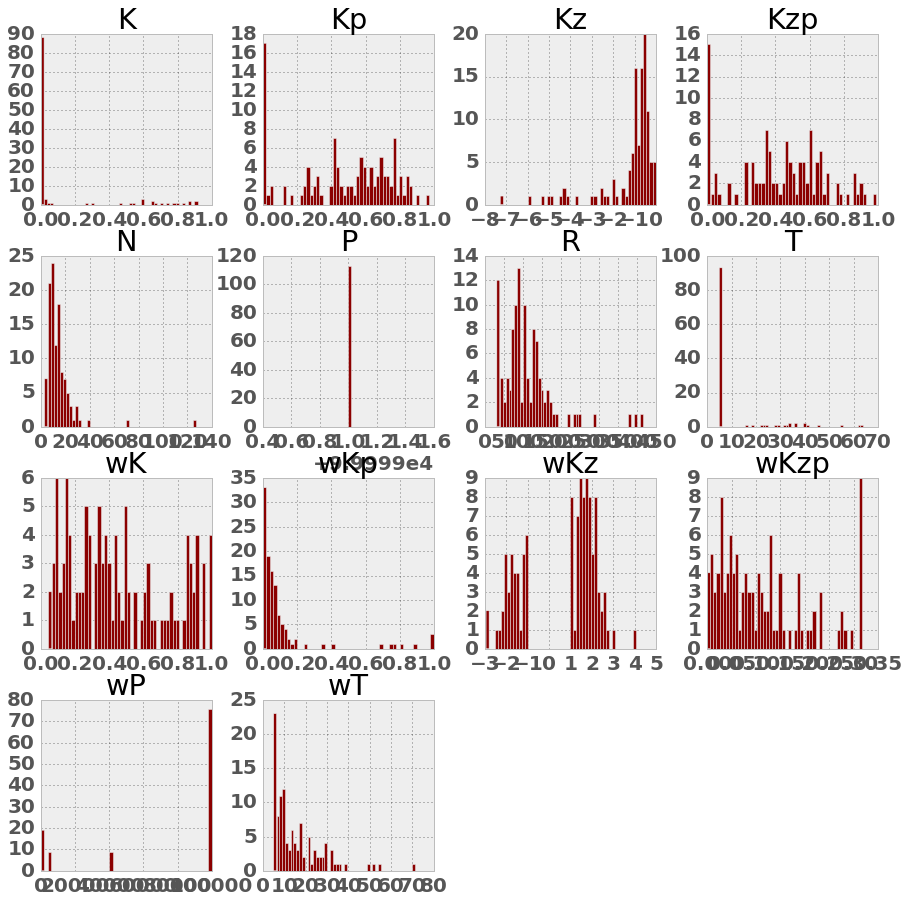

In [18]:
# Dispersed
df[df["Kz"]<0].hist(bins=50,figsize=(15,15),color="darkred")
plt.show()

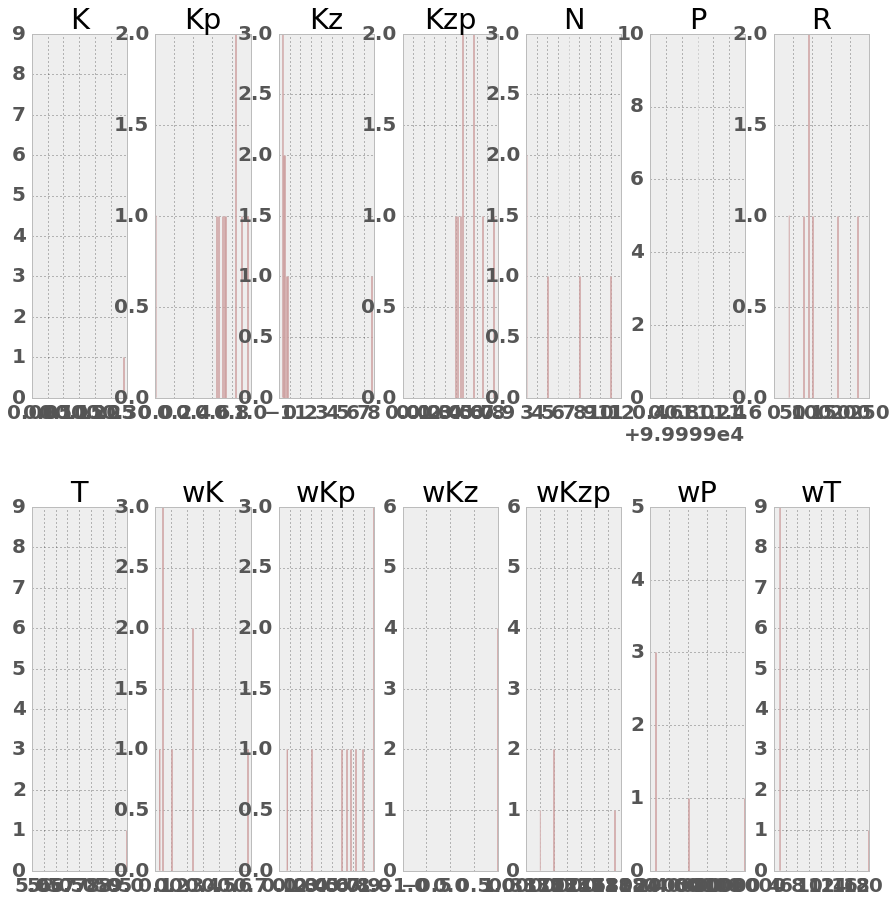

In [19]:
# Problems
df.ix[(df["wKzp"]>0.3165) & (df["wKzp"]<0.3185)].hist(bins=100,figsize=(15,15),color="darkred",layout=(2,7))
plt.show()

In [20]:
print "How many of my previous 11 top-scoring structures have completed the analysis?\n"
print df.ix[df["structid"].isin(["4BHW","2NPP","4NM6","4JSP","2OVQ","3ETO","3GT8","2RD0","2Y1M","2SHP","1RJB"]),["structid","chain","Kz","Kp","wKz","wKp"]]

How many of my previous 11 top-scoring structures have completed the analysis?

     structid chain      Kz       Kp     wKz      wKp
1079     2OVQ     B   6.043  0.00001 -1.4460  0.07683
1199     3GT8     C  11.200  0.00001 -0.9358  0.17890
1207     1RJB     A  10.430  0.00001  1.3470  0.09101
1510     2SHP     B  13.010  0.00001  3.5960  0.00015
1907     2RD0     A  18.620  0.00001  5.2870  0.00001
2260     2NPP     A  10.380  0.00001 -2.8830  0.00177
2410     3ETO     B   7.856  0.00001  3.3110  0.00035


In [21]:
lower = ["1d5r","2shp","2rd0","4mzr","2ovq","2ii5","2npp","3iz0","2lwi","1dc2"]
upper = [s.upper() for s in lower]
print "Them!"
print df.ix[df["structid"].isin(upper),["structid","chain","Kz","wKz","Kp","wKp"]]
print "Missing:",', '.join([s for s in upper if s not in df["structid"].values])


sigClustObs = (df["T"]>5)  & (df["Kz"]>0)  & (df["Kp"]<0.0001)
sigClustVal = (df["wT"]>5) & (df["wKz"]>0) & (df["wKp"]<0.0001)
sigDispObs  = (df["T"]>5)  & (df["Kz"]<0)  & (df["Kp"]<0.0001)
sigDispVal  = (df["wT"]>5) & (df["wKz"]<0) & (df["wKp"]<0.0001)

print "\nSignificantly clustered observations: %d"%sigClustObs.sum()
print df.ix[sigClustObs,["structid","chain","R","N","T","K","Kz","Kp","Kzp"]]

print "\nSignificantly clustered values: %d"%sigClustVal.sum()
print df.ix[sigClustVal,["structid","chain","R","N","wT","wK","wKz","wKp","wKzp"]]

print "\nSignificantly dispersed observations: %d"%sigDispObs.sum()
print df.ix[sigDispObs,["structid","chain","R","N","T","K","Kz","Kp","Kzp"]]

print "\nSignificantly dispersed values: %d"%sigDispVal.sum()
print df.ix[sigDispVal,["structid","chain","R","N","wT","wK","wKz","wKp","wKzp"]]

Them!
     structid chain      Kz    wKz       Kp      wKp
667      2LWI     A   4.346 -1.497  0.00078  0.07468
1079     2OVQ     B   6.043 -1.446  0.00001  0.07683
1510     2SHP     B  13.010  3.596  0.00001  0.00015
1552     1DC2     A   4.409  1.850  0.00039  0.03253
1907     2RD0     A  18.620  5.287  0.00001  0.00001
2260     2NPP     A  10.380 -2.883  0.00001  0.00177
2575     1D5R     A  11.670  2.238  0.00001  0.01230
Missing: 4MZR, 2II5, 3IZ0

Significantly clustered observations: 1881
     structid chain     R    N   T       K      Kz       Kp           Kzp
0        2H57     C   166   19  13  0.6725  11.370  0.00001  5.818000e-30
1        3FDW     A   130   19  13  0.5263   6.732  0.00001  1.669000e-11
2        1QSC     A   172   19  11  0.2865   6.351  0.00001  2.139000e-10
4        2HT9     B   111   19  11  0.5088   8.671  0.00001  4.277000e-18
5        1W2C     A   265   68  22  0.6550   8.639  0.00001  5.661000e-18
7        3RAY     A   159   19  10  0.2573   6.402  0.00

KeyError: 'recp'

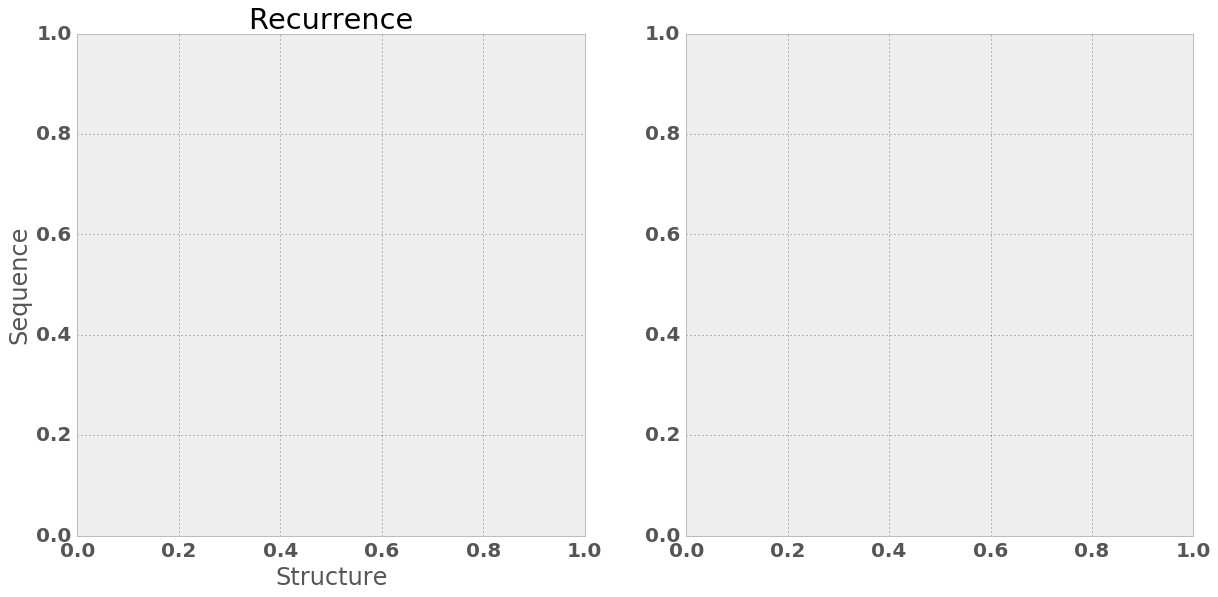

In [22]:
# Structure / Sequence Correlation
fig,ax = plt.subplots(1,2,figsize=(20,9))
ax[0].set_title("Recurrence")
ax[0].set_xlabel("Structure")
ax[0].set_ylabel("Sequence")
ax[0].plot(-np.log10(df["recp"]),-np.log10(df["recsp"]),marker='o',linestyle='',alpha=0.7)
ax[0].set_xlim([0,5])
ax[0].set_ylim([0,5])
ax[1].set_title("SNP Clustering")
ax[1].set_xlabel("Structure")
ax[1].set_ylabel("Sequence")
ax[1].plot(-np.log10(df["snpp"]),-np.log10(df["snpsp"]),marker='o',linestyle='',alpha=0.7)
ax[1].set_xlim([0,5])
ax[1].set_ylim([0,5])
fig.suptitle("log10-P-Value Correlation Plots",fontsize=25)
plt.show()

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,6))
fig.suptitle("Structural P-Values",fontsize=35)
ax[0].hist(df.ix[~df["recp"].isnull(),"recp"],bins=100)
ax[1].hist(df.ix[~df["snpp"].isnull(),"snpp"],bins=100)
plt.tight_layout()
plt.show()

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(20,6))
fig.suptitle("Sequence P-Values",fontsize=35)
ax[0].hist(df.ix[~df["recsp"].isnull(),"recsp"],bins=100)
ax[1].hist(df.ix[~df["snpsp"].isnull(),"snpsp"],bins=100)
plt.tight_layout()
plt.show()

In [ ]:
def qqplot(pvec,ax=None,labels=None,color="darkblue",zoom=False):
    null = np.array([i*1./len(pvec) for i in range(1,len(pvec)+1)])
    pvec = np.sort(pvec)
    if zoom:
        null = null[null<0.05]
        pvec = pvec[null<0.05]
        if type(color)!=str:
            color = color[null<0.05]
        ax.plot([1,5.5],[1,5.5],color='grey',linestyle='-',linewidth=1)
    else:
        ax.plot([0,5.5],[0,5.5],color='grey',linestyle='-',linewidth=1)
    ax.set_xlim([0,5.5])
    ax.set_ylim([0,5.5])
    if type(color)==str:
        ax.plot(-np.log10(null),-np.log10(pvec),marker='o',linestyle='',alpha=0.7,c=color,markeredgewidth=0.0)
    else:
        ax.scatter(-np.log10(null),-np.log10(pvec),c=color,cmap="seismic")
    # Annotate the top 5 structures
    for i in range(5):
        label = tuple(labels[i])
        x,y   = -np.log10(null[i]),-np.log10(pvec[i])
        from random import randint
        ax.annotate("%s.%s"%label,xy=(x,y),textcoords="offset points",
                        ha="right",va="bottom",
                        xytext=(i*randint(-20,-10),(5-i)*randint(5,8)),
                        arrowprops=dict(facecolor="black",shrink=0.25))

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,9))
fig.suptitle("Structural P-Value QQ-Plots",fontsize=35)
ax[0].set_title("Recurrence")
ax[0].set_xlabel("Expected")
ax[0].set_ylabel("Observed")
qqplot(df.sort("recp")["recp"].values,ax[0],df.sort("recp")[["sid","chain"]].values)
ax[1].set_title("SNP Clustering")
ax[1].set_xlabel("Expected")
ax[1].set_ylabel("Observed")
qqplot(df.sort("snpp")["snpp"].values,ax[1],df.sort("snpp")[["sid","chain"]].values)
# plt.tight_layout()
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,9))
fig.suptitle("Sequence P-Value QQ-Plots",fontsize=25)
ax[0].set_title("Recurrence")
ax[0].set_xlabel("Expected")
ax[0].set_ylabel("Observed")
qqplot(df.sort("recsp")["recsp"].values,ax[0],df.sort("recsp")[["sid","chain"]].values)
ax[1].set_title("SNP Clustering")
ax[1].set_xlabel("Expected")
ax[1].set_ylabel("Observed")
qqplot(df.sort("snpsp")["snpsp"].values,ax[1],df.sort("snpsp")[["sid","chain"]].values)
plt.subplots_adjust(left=0,bottom=0) # why is the necessary for this one plot?
plt.show()

In [ ]:
from qvalue import qvalue
snp_fdr  = sorted(qvalue.estimate(df["snpp"]))
rec_fdr  = sorted(qvalue.estimate(df["recp"]))
snps_fdr = sorted(qvalue.estimate(df["snpsp"]))
recs_fdr = sorted(qvalue.estimate(df["recsp"]))
tdf = pd.DataFrame([snp_fdr,rec_fdr,snps_fdr,recs_fdr]).transpose()
tdf.columns = ["snp_fdr","rec_fdr","snps_fdr","recs_fdr"]
tdf.index = df.index
df = tdf.merge(df,how='left',left_index=True,right_index=True)

print "\n####=====================================================####"
print "Structural P-Values passing q-value Correction at FDR<0.1"
print "Clustering:     %d"%(np.array(snp_fdr)<0.1).sum()
print "Recurrence:     %d"%(np.array(rec_fdr)<0.1).sum()
print "\n####=====================================================####"
print "Sequence P-Values passing q-value Correction at FDR<0.1"
print "Clustering:     %d"%(np.array(snps_fdr)<0.1).sum()
print "Recurrence:     %d"%(np.array(recs_fdr)<0.1).sum()

In [ ]:
# Output all scores, p-values, and q-values to file
with open("cosmic_clumps_results.txt",'wb') as fout:
    df.to_csv(fout,sep='\t')

In [ ]:
# Compare results with Kamburov et al
lower = ["1d5r","2shp","2rd0","4mzr","2ovq","2ii5","2npp","3iz0","2lwi","1dc2"]
upper = [s.upper() for s in lower]
print "\nStructures passing FDR of 0.1 in Kamburov et al with TCGA (%d):"%len(upper)
print ', '.join(upper)

print "\nStructures passing FDR of 0.1 for Cosmic (%d):"%(df["rec_fdr"]<0.1).sum()
print df.ix[df["rec_fdr"]<0.1,["sid","chain","recp","recsp","rec_fdr","recs_fdr"]]

print "\nP-values and FDR for all structures reported significant in Kamburov et al (%d):"%(df["sid"].isin(upper)).sum()
print df.ix[df["sid"].isin(upper),["sid","chain","recp","recsp","rec_fdr","recs_fdr"]]

In [ ]:
# SNPCLUST # Rank Correlation between nominally significant sequence- and structure-clustered structures
from scipy.stats import kendalltau,spearmanr
print "Focus: SNP Clustering"
print "Structures with nominally significant structural clustering: %d"%(df["snpp"] <0.001).sum()
print "Structures with nominally significant sequence   clustering: %d"%(df["snpsp"]<0.001).sum()
sig_str = [tuple(t) for t in df.ix[df["snpp"] <0.001,["sid","chain"]].values.tolist()]
sig_seq = [tuple(t) for t in df.ix[df["snpsp"]<0.001,["sid","chain"]].values.tolist()]
print "\nOverlapping structures from both sets: %d"%len(set(sig_str).intersection(sig_seq))
sig_str = [tuple(t) for t in df[(df["snpp"]<0.001) & (df["snpsp"]<0.001)].sort( "snpp")[["sid","chain"]].values.tolist()]
sig_seq = [tuple(t) for t in df[(df["snpp"]<0.001) & (df["snpsp"]<0.001)].sort("snpsp")[["sid","chain"]].values.tolist()]
print "\nSpearman Rank within the overlapping subset:   %g (p=%g)"%spearmanr( range(len(sig_seq)),[sig_seq.index(struct) for struct in sig_str])
print "Kendall's Tau within the overlapping subset:   %g (p=%g)"%kendalltau(range(len(sig_seq)),[sig_seq.index(struct) for struct in sig_str])
print "\nSeq\t\tStruct"
for s1,s2 in zip(sig_seq,sig_str):
    print "%s.%s"%s1+"\t\t"+"%s.%s"%s2

In [ ]:
# DELTA DAF # Rank Correlation between nominally significant sequence- and structure-clustered structures
from scipy.stats import kendalltau,spearmanr
print "Focus: Recurrence"
print "Structures with nominally significant structural clustering: %d"%(df[ "recp"]<0.001).sum()
print "Structures with nominally significant sequence   clustering: %d"%(df["recsp"]<0.001).sum()
sig_str = [tuple(t) for t in df.ix[df[ "recp"]<0.001,["sid","chain"]].values.tolist()]
sig_seq = [tuple(t) for t in df.ix[df["recsp"]<0.001,["sid","chain"]].values.tolist()]
print "\nOverlapping structures from both sets: %d"%len(set(sig_str).intersection(sig_seq))
sig_str = [tuple(t) for t in df[(df["recp"]<0.001) & (df["recsp"]<0.001)].sort( "recp")[["sid","chain"]].values.tolist()]
sig_seq = [tuple(t) for t in df[(df["recp"]<0.001) & (df["recsp"]<0.001)].sort("recsp")[["sid","chain"]].values.tolist()]
print "\nSpearman Rank within the overlapping subset:   %g (p=%g)"%spearmanr(range(len(sig_seq)),[sig_seq.index(struct) for struct in sig_str])
print "Kendall's Tau within the overlapping subset:   %g (p=%g)"%kendalltau(range(len(sig_seq)),[sig_seq.index(struct) for struct in sig_str])
print "\nSeq\t\tStruct"
for s1,s2 in zip(sig_seq,sig_str):
    print "%s.%s"%s1+"\t\t"+"%s.%s"%s2